In [154]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pkg_resources
from pathlib import Path

In [20]:
MIN_MATCH_COUNT = 10

img1 = cv2.imread('im_0.png',0)          # queryImage
img2 = cv2.imread('im_00.png',0)         # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 1000)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)


if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M_1, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

In [37]:
MIN_MATCH_COUNT = 10

img1 = cv2.imread('im_1.png',0)          # queryImage
img2 = cv2.imread('im_11.png',0)         # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 1000)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)


if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M_2, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

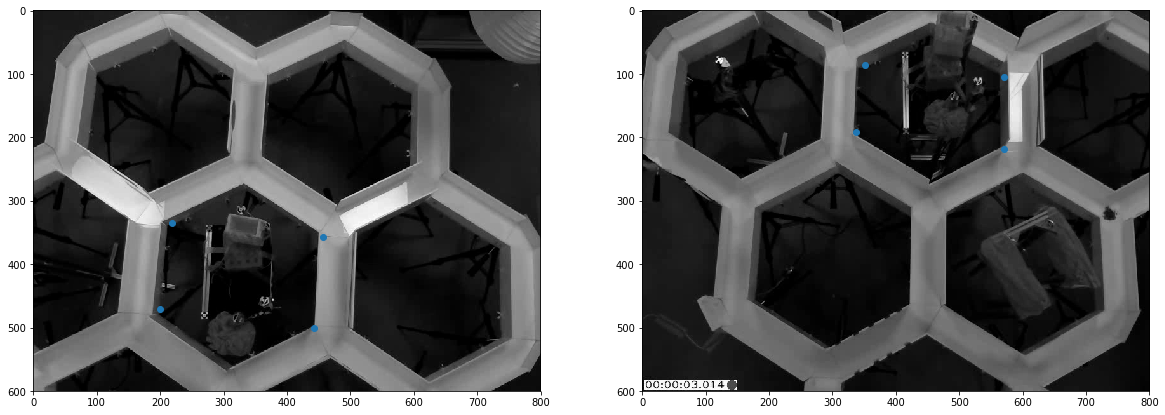

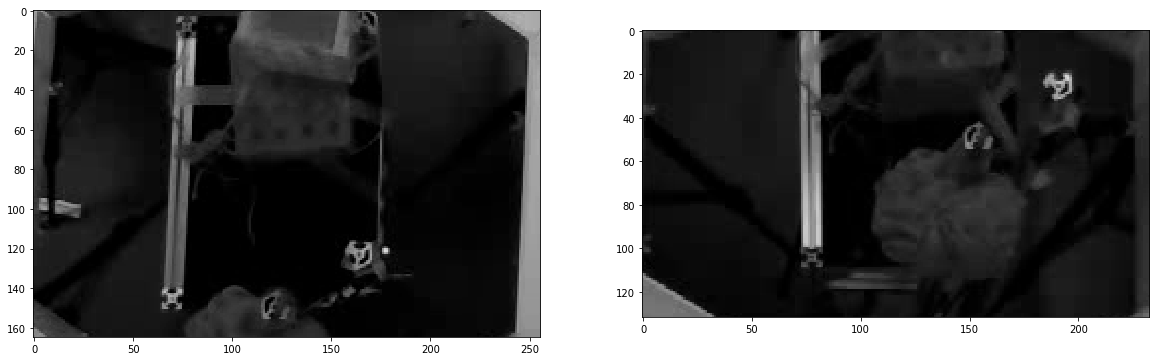

In [22]:
img1 = cv2.imread('im_0.png',0)
img2 = cv2.imread('im_1.png',0) 

list1 = np.array([[219,335],[456,357],[200,471],[443,500]])
list2 = np.array([[351,86],[571,104],[338,192],[571,218]])

fig, ax = plt.subplots(1, 2, figsize = (20,8))
ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
ax[0].plot(list1[:,0],list1[:,1],'o')
ax[1].plot(list2[:,0],list2[:,1],'o')

xs1 = np.array([219,456,200,443])
ys1 = np.array([335,357,471,500])
xs2 = np.array([351,571,338,571])
ys2 = np.array([86,104,192,218])

minx1, miny1 = np.min(xs1), np.min(ys1)
maxx1, maxy1 = np.max(xs1), np.max(ys1)

minx2, miny2 = np.min(xs2), np.min(ys2)
maxx2, maxy2 = np.max(xs2), np.max(ys2)

img1_crop = img1[miny1:maxy1, minx1:maxx1]
img2_crop = img2[miny2:maxy2, minx2:maxx2]

fig, ax = plt.subplots(1, 2, figsize = (20,8))
ax[0].imshow(img1_crop, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(img2_crop, cmap='gray', vmin=0, vmax=255)

In [195]:
list1 = np.array([[219,335],[456,357],[200,471],[443,500]])
list2 = np.array([[351,86],[571,104],[338,192],[571,218]])

pts_1 = np.float32(list1).reshape(-1,1,2)
dst_1 = cv2.perspectiveTransform(pts_1,M_1)

pts_2 = np.float32(list2).reshape(-1,1,2)
dst_2 = cv2.perspectiveTransform(pts_2,M_2)

new_xs1, new_ys1 = dst_1[:,0,0], dst_1[:,0,1]
new_xs2, new_ys2 = dst_2[:,0,0], dst_2[:,0,1]

minx1, miny1 = int(np.min(new_xs1)), int(np.min(new_ys1))
maxx1, maxy1 = int(np.max(new_xs1)), int(np.max(new_ys1))

minx2, miny2 = int(np.min(new_xs2)), int(np.min(new_ys2))
maxx2, maxy2 = int(np.max(new_xs2)), int(np.max(new_ys2))

202 330


In [201]:
path_0 = r'C:\Users\Gebruiker\Videos\Probetrials\2018-12-18_09-26-58_cam_0.avi'
path_1 = r'C:\users\gebruiker\videos\probetrials\2018-12-18_09-26-58_cam_1.avi'

cap_0 = cv2.VideoCapture(path_0)

cap_1 = cv2.VideoCapture(path_1)

MAX = 50
i=0
width1, height1 = maxx1-minx1, maxy1-miny1
width2, height2 = maxx2-minx2, maxy2-miny2
val1 = np.zeros((height1,width1, MAX))
val2 = np.zeros((height2,width2, MAX))

while i < MAX-1:
    i+=1
    rt, frame_0 = cap_0.read()
    frame_0 = cv2.cvtColor(frame_0, cv2.COLOR_BGR2GRAY)
    frame_0 = frame_0[miny1:maxy1, minx1:maxx1]
    for k in range(height1):
        for j in range(width1):
            val1[k,j,i] = frame_0[k,j]
    rt, frame_1 = cap_1.read()
    frame_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2GRAY)
    frame_1 = frame_1[miny2:maxy2,minx2:maxx2]
    for k in range(height2):
        for j in range(width2):
            val2[k,j,i] = frame_1[k,j]
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap_0.release()
cv2.destroyAllWindows()

In [202]:
stdvs1 = []
for i in range(height1):
    for j in range(width1):   
        stdv1 = np.std(val1[i,j,:])
        stdvs1.append(stdv1)

a1 = np.argmax(stdvs1)
b1 = a1/width1
b1 = np.floor(b1)
a1 = a1-b1*width1

stdvs2 = []
for i in range(height2):
    for j in range(width2):   
        stdv2 = np.std(val2[i,j,:])
        stdvs2.append(stdv2)

a2 = np.argmax(stdvs2)
b2 = a2/width2
b2 = np.floor(b2)
a2 = a2-b2*width2

print(a1, b1)
print(a2, b2)

165.0 112.0
189.0 19.0


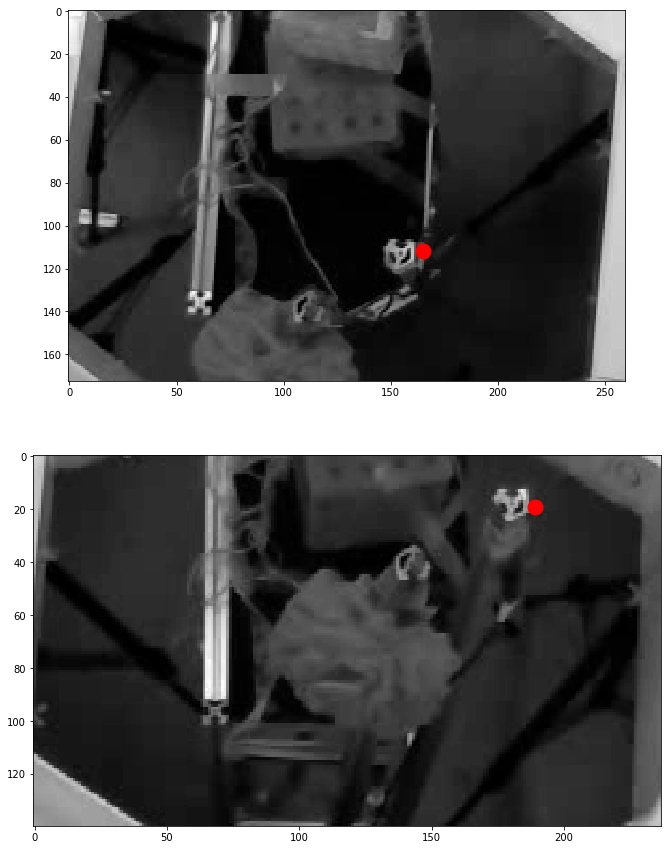

In [198]:
fig, ax = plt.subplots(2, 1, figsize = (15,15))
img1 = cv2.imread('im_00.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = img1[miny1:maxy1, minx1:maxx1]
img2 = cv2.imread('im_11.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = img2[miny2:maxy2, minx2:maxx2]
ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[0].plot(a1,b1, 'o', markersize = 15, color = 'red')
ax[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
ax[1].plot(a2,b2, 'o', markersize = 15, color = 'red')

367.0 442.0 531.0 102.0


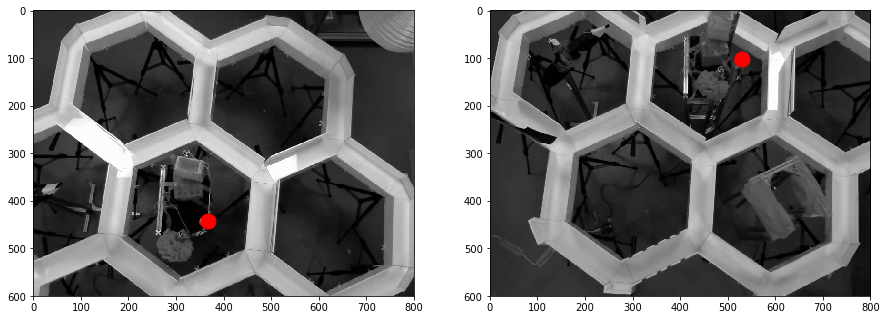

In [203]:
a1_ = a1+minx1
b1_ = b1+miny1

a2_ = a2+minx2
b2_ = b2+miny2

fig, ax = plt.subplots(1, 2, figsize = (15,15))
img1 = cv2.imread('im_00.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('im_11.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[0].plot(a1_,b1_, 'o', markersize = 15, color = 'red')
ax[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
ax[1].plot(a2_,b2_, 'o', markersize = 15, color = 'red')

In [182]:
path_0 = r'C:\Users\Gebruiker\Videos\Probetrials\2018-12-18_09-26-58_cam_0.avi'
path_1 = r'C:\users\gebruiker\videos\probetrials\2018-12-18_09-26-58_cam_1.avi'

cap_0 = cv2.VideoCapture(path_0)

cap_1 = cv2.VideoCapture(path_1)

MAX = 20
i=0
width1, height1 = 800,600
width2, height2 = maxx2-minx2, maxy2-miny2
val1 = np.zeros((height1,width1, MAX))
val2 = np.zeros((height2,width2, MAX))

while i < MAX-1:
    i+=1
    rt, frame_0 = cap_0.read()
    frame_0 = cv2.cvtColor(frame_0, cv2.COLOR_BGR2GRAY)
    frame_0 = frame_0
    for k in range(height1):
        for j in range(width1):
            val1[k,j,i] = frame_0[k,j]
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap_0.release()
cv2.destroyAllWindows()

In [ ]:
stdvs1 = []
for i in range(height1):
    for j in range(width1):   
        stdv1 = np.std(val1[i,j,:])
        stdvs1.append(stdv1)

a1 = np.argmax(stdvs1)
b1 = a1/width1
b1 = np.floor(b1)
a1 = a1-b1*width1

367.0 442.0


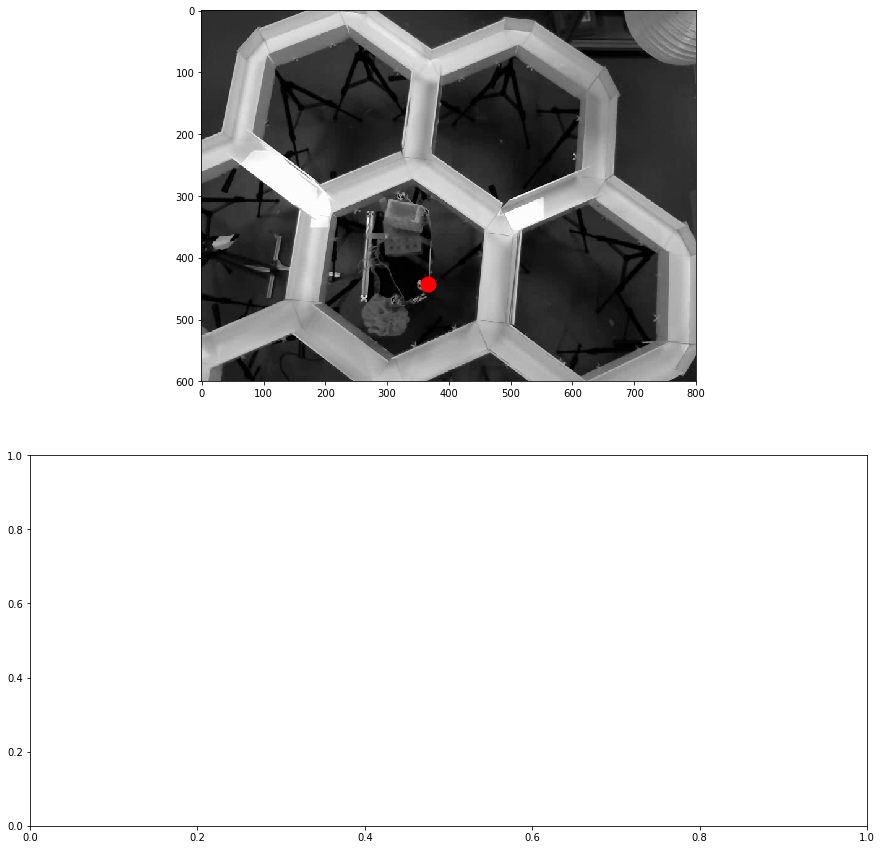

In [185]:
print(a1, b1)

fig, ax = plt.subplots(2, 1, figsize = (15,15))
img1 = cv2.imread('im_00.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = img1
ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[0].plot(a1,b1, 'o', markersize = 15, color = 'red')